In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [308]:
MCI_EDA = pd.read_csv('full_db.csv')
MCI_EDA.head()

,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,OCC_DOW,OCC_HOUR,lowinc_percent,Density Per Square km,Female Unemployment Ratio,Male Unemployment Ratio,No Diploma Certificate Degree Percent,No Official Lang Percent,DIVISION,LOCATION_TYPE,PREMISES_TYPE,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,Longtiude,Latitude
0,1,GO-20141262074,2014-01-01 05:00:00+00:00,1998-06-01 04:00:00+00:00,2014,January,1,1,Wednesday,12,1998.0,6,1.0,152.0,0,12,14.0,3038.0,6.8,7.6,0.026913,0.022890,D32,"Apartment (Rooming House, Condo)",Apartment,1480,110,Administering Noxious Thing,Assault,38,Lansing-Westgate,38,Lansing-Westgate (38),-79.425896,43.757346
1,2,GO-20141260701,2014-01-01 05:00:00+00:00,2014-01-01 05:00:00+00:00,2014,January,1,1,Wednesday,3,2014.0,January,1.0,1.0,Wednesday,3,20.2,3136.0,6.4,6.7,0.119608,0.079638,D51,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,2120,200,B&E,Break and Enter,70,South Riverdale,70,South Riverdale (70),-79.350229,43.646293
2,3,GO-20141260889,2014-01-01 05:00:00+00:00,2014-01-01 05:00:00+00:00,2014,January,1,1,Wednesday,4,2014.0,January,1.0,1.0,Wednesday,4,47.9,44321.0,12.7,8.6,0.086672,0.027666,D51,"Apartment (Rooming House, Condo)",Apartment,1430,100,Assault,Assault,74,North St.James Town,74,North St.James Town (74),-79.376497,43.666423
3,4,GO-20141260973,2014-01-01 05:00:00+00:00,2014-01-01 05:00:00+00:00,2014,January,1,1,Wednesday,4,2014.0,January,1.0,1.0,Wednesday,4,NaN,NaN,NaN,NaN,NaN,NaN,NSA,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,2130,210,Theft Over,Theft Over,NSA,NSA,NSA,NSA,-85.488744,0.000000
4,5,GO-20141261050,2014-01-01 05:00:00+00:00,2014-01-01 05:00:00+00:00,2014,January,1,1,Wednesday,4,2014.0,January,1.0,1.0,Wednesday,4,9.7,8554.0,5.9,6.4,0.085818,0.045520,D54,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,1430,100,Assault,Assault,69,Blake-Jones,66,Danforth (66),-79.344839,43.678946


In [312]:
MCI_EDA.shape

(323296, 35)

In [309]:
MCI_EDA.describe()

,OBJECTID,REPORT_YEAR,REPORT_DAY,REPORT_DOY,REPORT_HOUR,OCC_YEAR,OCC_DAY,OCC_DOY,OCC_HOUR,lowinc_percent,Density Per Square km,Female Unemployment Ratio,Male Unemployment Ratio,No Diploma Certificate Degree Percent,No Official Lang Percent,UCR_CODE,UCR_EXT,Longtiude,Latitude
count,323296.000000,323296.000000,323296.000000,323296.000000,323296.000000,323296.000000,323296.000000,323296.000000,323296.000000,317833.000000,317833.000000,317833.000000,317833.000000,317833.000000,317833.000000,323296.000000,323296.000000,323296.000000,323296.000000
mean,161648.500000,2018.158115,15.744995,187.147781,12.926696,2018.094749,15.453476,186.427852,12.893389,27.681781,7158.711672,8.820945,8.230582,0.108116,0.046292,1704.459133,146.771216,-79.475536,43.144559
std,93327.660651,2.571347,8.769573,103.790065,6.244720,2.661941,8.921998,104.146684,6.808623,11.339778,5961.155077,2.233335,1.865964,0.072321,0.038662,327.123233,52.068977,0.694300,4.925584
min,1.000000,2014.000000,1.000000,1.000000,1.000000,1966.000000,1.000000,1.000000,1.000000,4.100000,1040.000000,4.300000,4.100000,0.010834,0.002087,1410.000000,100.000000,-85.488744,0.000000
25%,80824.750000,2016.000000,8.000000,99.000000,8.000000,2016.000000,8.000000,98.000000,7.000000,19.900000,3377.000000,6.900000,6.900000,0.041132,0.021904,1430.000000,100.000000,-79.478939,43.659896
50%,161648.500000,2018.000000,16.000000,190.000000,13.000000,2018.000000,15.000000,189.000000,14.000000,28.100000,5395.000000,8.600000,8.300000,0.107420,0.036844,1450.000000,100.000000,-79.396397,43.699304
75%,242472.250000,2020.000000,23.000000,277.000000,18.000000,2020.000000,23.000000,276.000000,19.000000,35.600000,8943.000000,10.400000,9.500000,0.147957,0.058537,2120.000000,200.000000,-79.327244,43.750882
max,323296.000000,2022.000000,31.000000,366.000000,23.000000,2022.000000,31.000000,366.000000,23.000000,60.100000,44321.000000,15.200000,14.100000,0.334403,0.265881,2135.000000,230.000000,-78.551414,44.351392


In [310]:
MCI_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323296 entries, 0 to 323295
Data columns (total 35 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   OBJECTID                               323296 non-null  int64  
 1   EVENT_UNIQUE_ID                        323296 non-null  object 
 2   REPORT_DATE                            323296 non-null  object 
 3   OCC_DATE                               323296 non-null  object 
 4   REPORT_YEAR                            323296 non-null  int64  
 5   REPORT_MONTH                           323296 non-null  object 
 6   REPORT_DAY                             323296 non-null  int64  
 7   REPORT_DOY                             323296 non-null  int64  
 8   REPORT_DOW                             323296 non-null  object 
 9   REPORT_HOUR                            323296 non-null  int64  
 10  OCC_YEAR                               323296 non-null  

In [313]:
MCI_EDA.columns

Index(['OBJECTID', 'EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE', 'REPORT_YEAR',
       'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW', 'REPORT_HOUR',
       'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR',
       'lowinc_percent', 'Density Per Square km', 'Female Unemployment Ratio',
       'Male Unemployment Ratio', 'No Diploma Certificate Degree Percent',
       'No Official Lang Percent', 'DIVISION', 'LOCATION_TYPE',
       'PREMISES_TYPE', 'UCR_CODE', 'UCR_EXT', 'OFFENCE', 'MCI_CATEGORY',
       'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140',
       'Longtiude', 'Latitude'],
      dtype='object')

In [311]:
#convert year and day columns to integer instead of float
MCI_EDA['OCC_YEAR'] = MCI_EDA['OCC_YEAR'].astype(int) 
MCI_EDA['OCC_DAY'] = MCI_EDA['OCC_DAY'].astype(int)

In [314]:
#years with the higer number of crimes

MCI_EDA.OCC_YEAR.value_counts().nlargest(10)

OCC_YEAR
2022    40226
2019    40026
2018    37490
2017    35508
2020    35065
2021    34529
2016    33623
2015    32909
2014    32467
2013      614
Name: count, dtype: int64

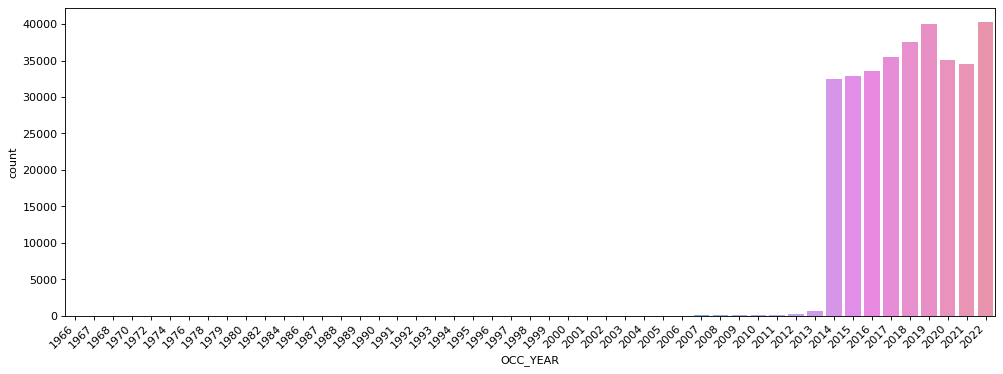

In [315]:
#we can see here that there is very low crimes reported before 2014, therefore we will truncate the data before 2014
plt.figure(figsize=(15, 5), dpi=80)
plot= sns.countplot(x='OCC_YEAR', data=MCI_EDA)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.show()

### We can see in the chart above, that there is very low crimes reported before 2014, therefore we will truncate the data before 2014

In [316]:
#Select records from 2014 only
mciEDA2014 = MCI_EDA[MCI_EDA['OCC_YEAR']>= 2014]
mciEDA2014.shape

(321843, 35)

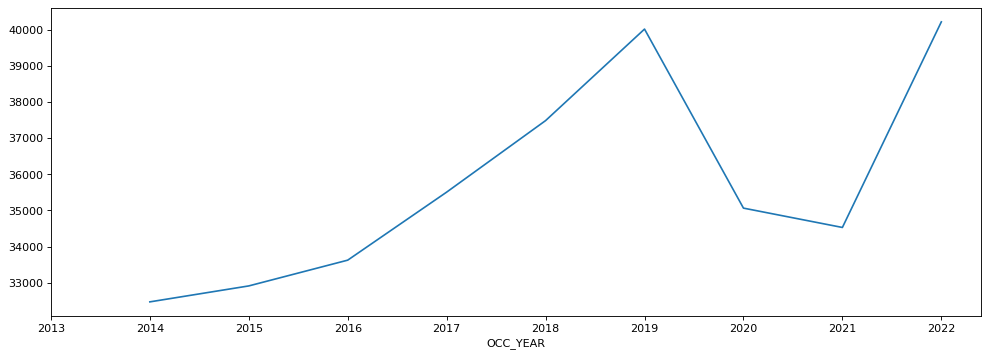

In [320]:
# Much better now
import numpy as np
plt.figure(figsize=(15, 5), dpi=80)
mciEDA2014.groupby('OCC_YEAR')['OCC_YEAR'].size().plot()
plt.xticks(np.arange(2013, 2023, 1))
plt.show()

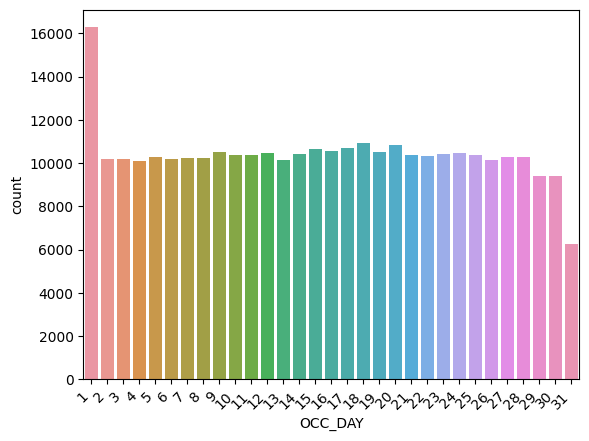

In [324]:
# More than 16000 crimes happend in the first of the month, probably because of new year
plot= sns.countplot(x='OCC_DAY', data=mciEDA2014)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.show()

In [326]:
stat, p = stats.shapiro(mciEDA2014['OCC_DAY'])
if p > 0.05:
    print (p, '\nNormally distributed')
else: 
    print (p, '\nReject the H0, not normally distributed')

0.0 
Reject the H0, not normally distributed


c:\Abubaker\all\Study_School_Univ_DCare_Cert\Mohammed\LightHouse - DataSciense BootCamp\pythonenv\gen\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


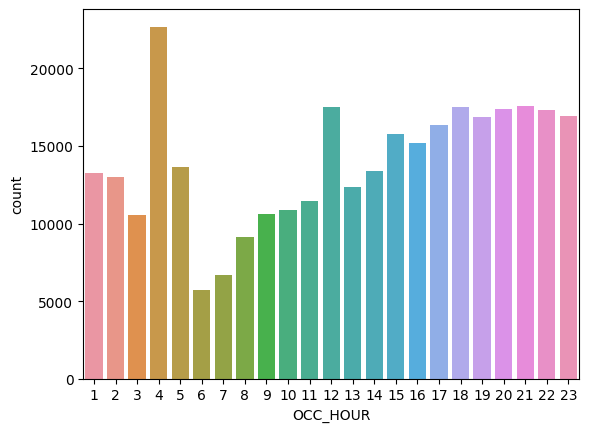

In [330]:
# More than 20000 crimes happend around 4 am
sns.countplot(x='OCC_HOUR', data=mciEDA2014)
plt.show()

In [329]:
stat, p = stats.shapiro(mciEDA2014['OCC_HOUR'])
if p > 0.05:
    print (p, '\nNormally distributed')
else: 
    print (p, '\nReject the H0, not normally distributed')

0.0 
Reject the H0, not normally distributed


c:\Abubaker\all\Study_School_Univ_DCare_Cert\Mohammed\LightHouse - DataSciense BootCamp\pythonenv\gen\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [321]:
#There are 141 neighbourhood
len(mciEDA2014.NEIGHBOURHOOD_140.unique())

141

In [322]:
# Top 10 area/neighbourhood has higher crime rate
mciEDA2014.NEIGHBOURHOOD_140.value_counts().nlargest(10)

NEIGHBOURHOOD_140
Waterfront Communities-The Island (77)    12274
Church-Yonge Corridor (75)                11091
West Humber-Clairville (1)                 8747
Bay Street Corridor (76)                   8500
Moss Park (73)                             7643
York University Heights (27)               6249
Downsview-Roding-CFB (26)                  6172
Kensington-Chinatown (78)                  6033
Woburn (137)                               5678
NSA                                        5391
Name: count, dtype: int64

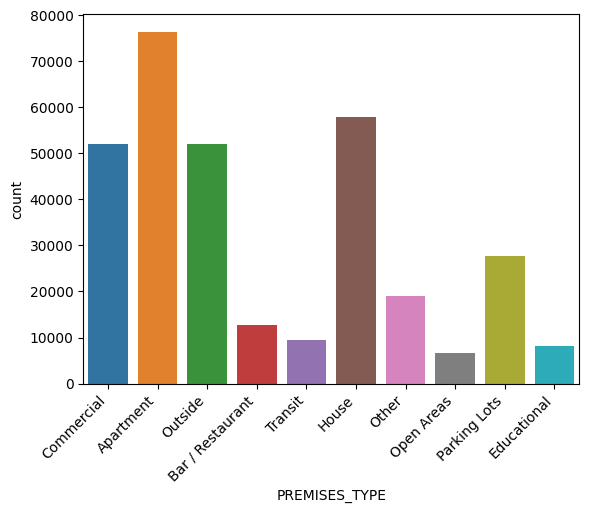

In [331]:
# More than 75000 crimes happend in Apartment
plot = sns.countplot(x='PREMISES_TYPE', data=mciEDA2014)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.show()

<Axes: xlabel='MCI_CATEGORY', ylabel='count'>

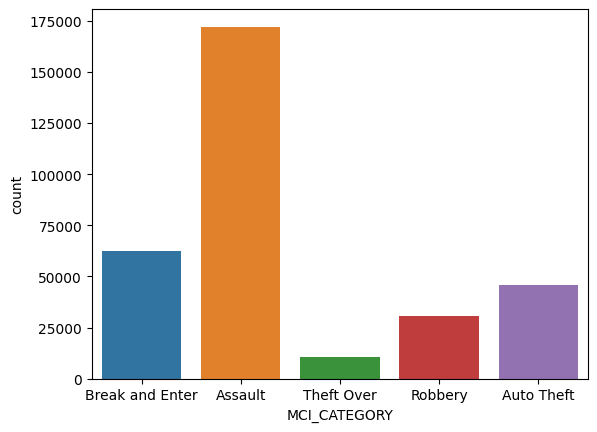

In [332]:
# Assault crim is most common crimes in GTA
sns.countplot(x='MCI_CATEGORY', data=mciEDA2014)

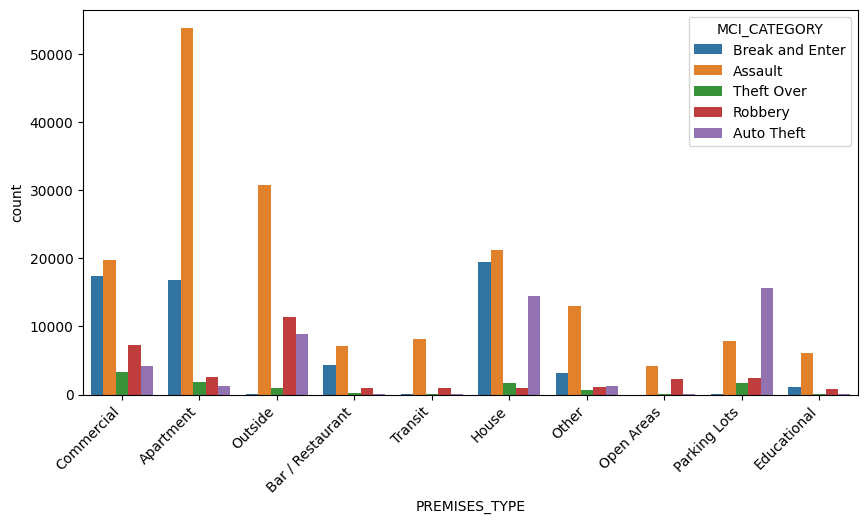

In [333]:
# Type of crime per location
plt.figure(figsize=(10,5))

chart = sns.countplot(
    data=mciEDA2014,
    x='PREMISES_TYPE',
    hue='MCI_CATEGORY'
)

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

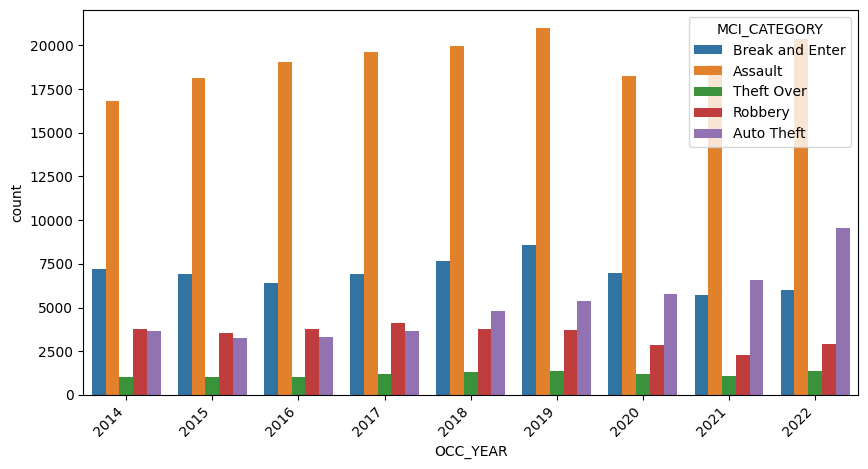

In [335]:
# Here we can see that number of Auto Theft crimes increased in 2022
plt.figure(figsize=(10,5))

chart = sns.countplot(
    data=mciEDA2014,
    x='OCC_YEAR',
    hue='MCI_CATEGORY'
)

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()